In [73]:
import pandas as pd
import talib
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

In [432]:
df = pd.read_csv("pattern_test_high.csv",low_memory=False)

In [433]:
import datetime
def read_binance_data(df):
    def to_date(date):
        try:
            return datetime.datetime.strptime(date, '%Y-%m-%d %I-%p')
        except:
            return datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

    df.reset_index(inplace=True)
    df['date'] = df['date'].apply(lambda x: to_date(x))
    return df

In [434]:
pattern_list ="""CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS""".split("\n")

In [435]:
df = read_binance_data(df)

In [436]:
df.head()

,index,Unnamed: 0,unix,date,symbol,open,high,low,close,Volume ETH,...,CDLSPINNINGTOP_test,CDLSTALLEDPATTERN_test,CDLSTICKSANDWICH_test,CDLTAKURI_test,CDLTASUKIGAP_test,CDLTHRUSTING_test,CDLTRISTAR_test,CDLUNIQUE3RIVER_test,CDLUPSIDEGAP2CROWS_test,CDLXSIDEGAP3METHODS_test
0,0,0,1.502942e+09,2017-08-17 04:00:00,ETH/USDT,652.74,652.74,298.0,300.79,122.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1.502946e+09,2017-08-17 05:00:00,ETH/USDT,301.61,303.28,300.0,303.10,377.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,1.502950e+09,2017-08-17 06:00:00,ETH/USDT,303.10,304.44,301.9,302.68,302.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,1.502953e+09,2017-08-17 07:00:00,ETH/USDT,302.68,307.96,302.6,307.96,753.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,1.502957e+09,2017-08-17 08:00:00,ETH/USDT,307.96,309.97,307.0,308.62,150.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [437]:
len(df)

40112

In [439]:
for p in pattern_list:
    
    T = len(df[df[f"{p}_test"] ==True])
    F = len(df[df[f"{p}_test"] ==False])
    if T != 0 and F != 0:
        print(p)
        print("False = ",F)
        print("True = ",T)
        print("True pct = " , T/(T+F))
        print("\n")

CDL3INSIDE
False =  22
True =  26
True pct =  0.5416666666666666


CDL3LINESTRIKE
False =  9
True =  14
True pct =  0.6086956521739131


CDL3OUTSIDE
False =  91
True =  96
True pct =  0.5133689839572193


CDL3WHITESOLDIERS
False =  14
True =  3
True pct =  0.17647058823529413


CDLBELTHOLD
False =  1912
True =  1288
True pct =  0.4025


CDLCLOSINGMARUBOZU
False =  1344
True =  921
True pct =  0.4066225165562914


CDLDOJI
False =  3942
True =  2441
True pct =  0.38242205859313805


CDLDOJISTAR
False =  20
True =  21
True pct =  0.5121951219512195


CDLDRAGONFLYDOJI
False =  495
True =  296
True pct =  0.37420986093552466


CDLENGULFING
False =  178
True =  185
True pct =  0.509641873278237


CDLGAPSIDESIDEWHITE
False =  4
True =  6
True pct =  0.6


CDLGRAVESTONEDOJI
False =  439
True =  269
True pct =  0.3799435028248588


CDLHAMMER
False =  589
True =  398
True pct =  0.403242147922999


CDLHARAMI
False =  89
True =  104
True pct =  0.538860103626943


CDLHARAMICROSS
False =  22
True 

### test CDL3LINESTRIKE

In [376]:
pettern = "CDL3LINESTRIKE"

In [377]:
from talib import *
import numpy as np

In [378]:
def volatility(data,col):
    log_returns = np.log(data[col]/data[col].shift())
    v = log_returns.std()*len(data)**.5
    return v



In [407]:
df = pd.read_csv("pattern_test.csv",low_memory=False)
df = read_binance_data(df)
close = df.close
high = df.high
low = df.low
open = df.open
df["adx_7"] = ADXR(high, low, close, timeperiod=7)
df["adx_20"] = ADXR(high, low, close, timeperiod=20)
df["aroondown"], df["aroonup"] = AROON(high, low, timeperiod=14)


data = df.iloc[100:]

In [402]:
data.head()

,index,date,unix,symbol,open,high,low,close,Volume ETH,Volume USDT,...,CDLSTICKSANDWICH_test,CDLTAKURI_test,CDLTASUKIGAP_test,CDLTHRUSTING_test,CDLTRISTAR_test,CDLUNIQUE3RIVER_test,CDLUPSIDEGAP2CROWS_test,CDLXSIDEGAP3METHODS_test,adx_7,adx_20
100,100,2017-08-21 08:00:00,1.503302e+09,ETH/USDT,318.50,324.30,312.75,318.72,21.51,6872.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.686235,24.803053
101,101,2017-08-21 09:00:00,1.503306e+09,ETH/USDT,318.72,318.72,314.98,317.29,23.54,7442.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.552385,25.560078
102,102,2017-08-21 10:00:00,1.503310e+09,ETH/USDT,317.29,325.30,316.77,321.21,76.01,24420.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.369103,26.351702
103,103,2017-08-21 11:00:00,1.503313e+09,ETH/USDT,321.21,333.66,312.60,331.53,76.98,24722.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.460981,27.006747
104,104,2017-08-21 12:00:00,1.503317e+09,ETH/USDT,331.53,331.53,325.42,331.30,89.06,29298.34,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,53.506061,27.552934


0.38278141473861


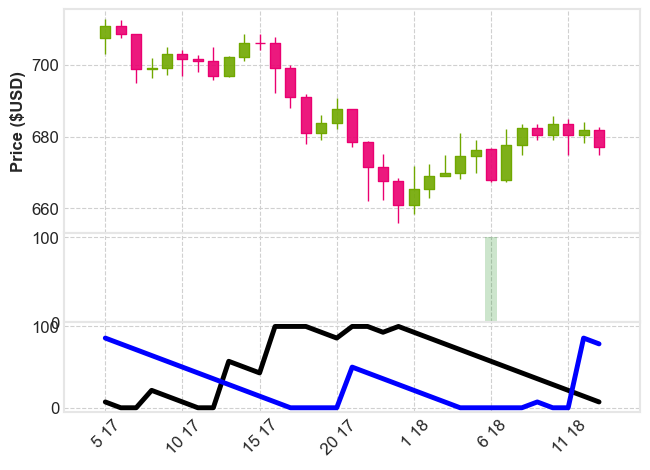

0.2777192932115591


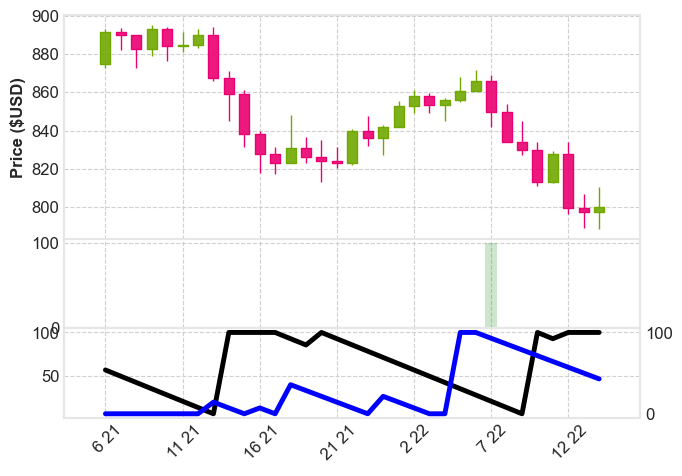

--------------------
--------------------
0.3339518504663788


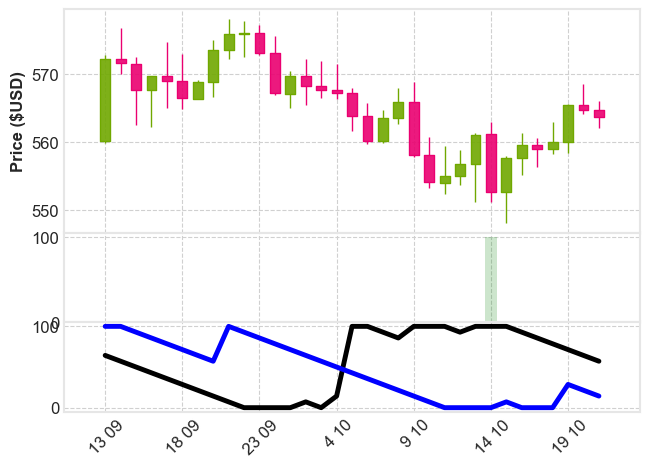

0.38596709334790236


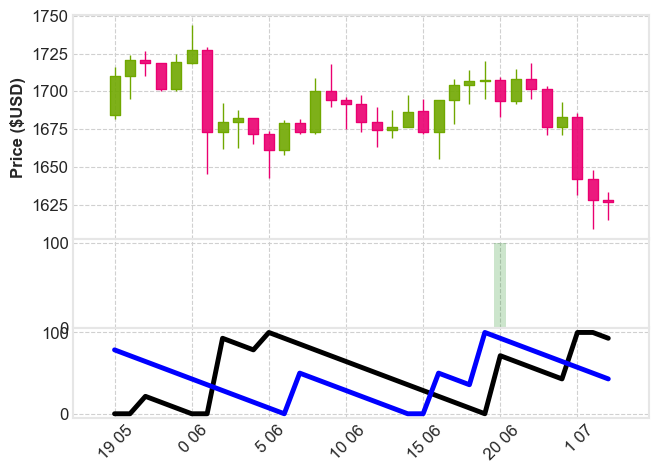

--------------------
--------------------
0.35019207081377524


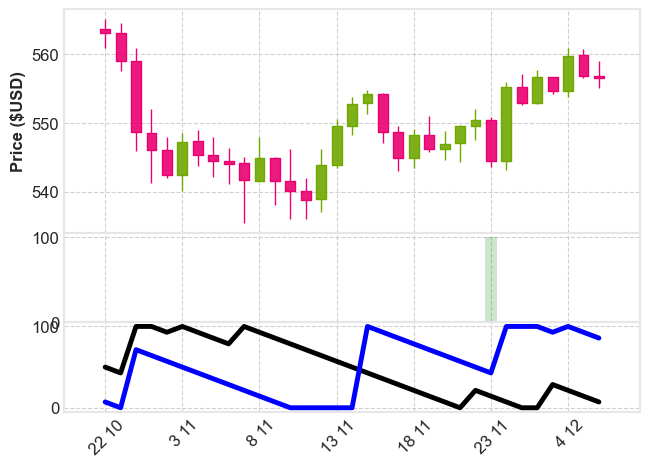

0.3615025164154374


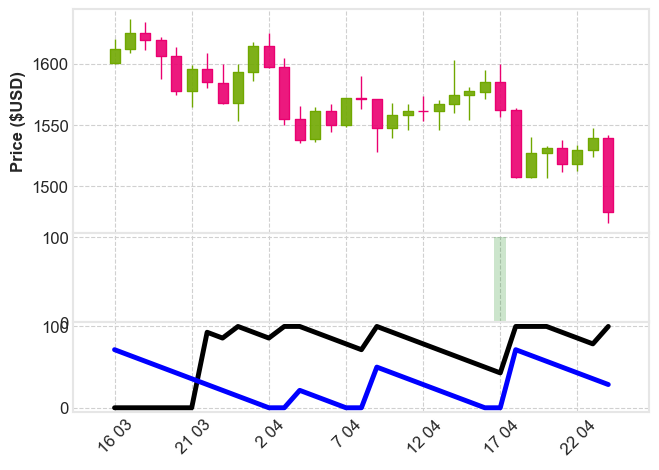

--------------------
--------------------
0.23665554078239792


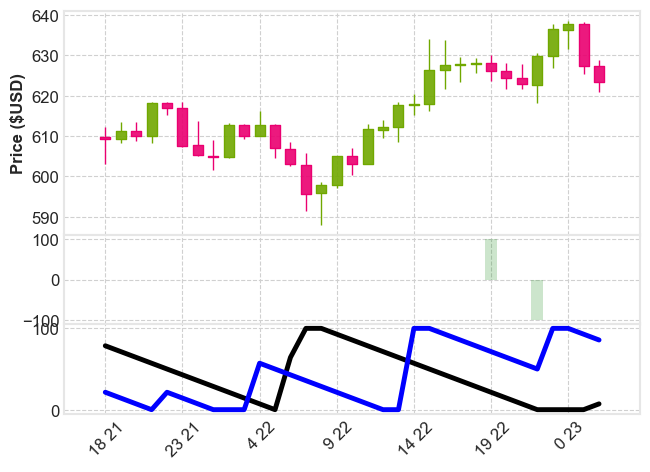

0.2930984706567157


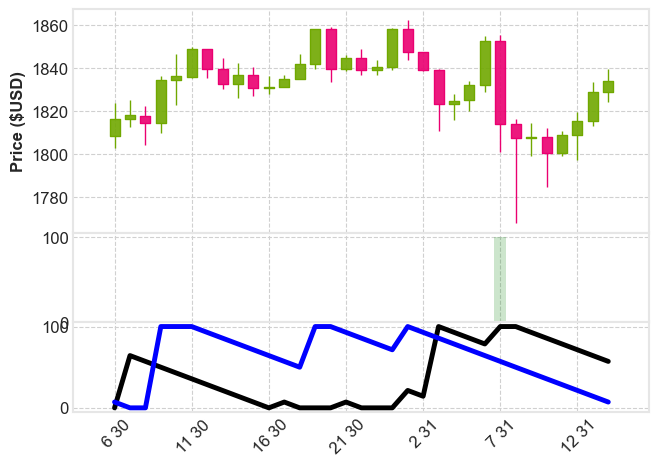

--------------------
--------------------
0.27909005410050053


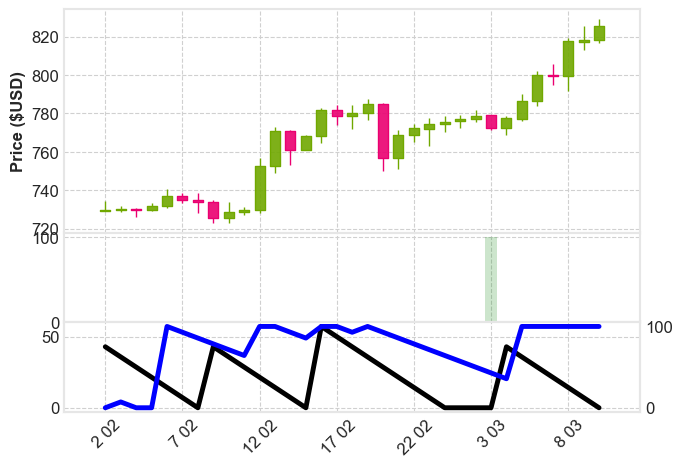

0.3853240525470819


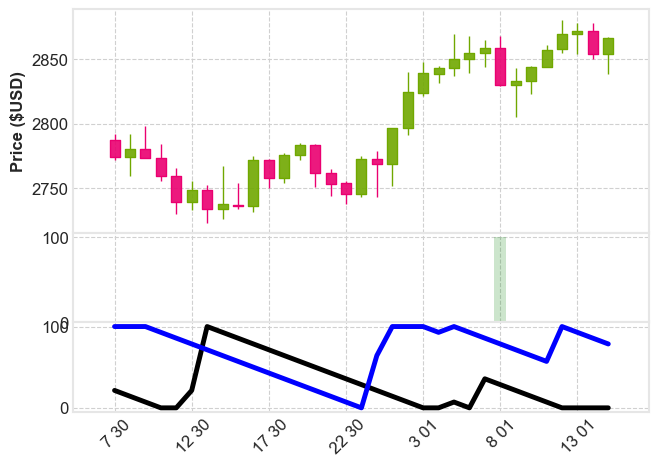

--------------------
--------------------
0.3106166946331723


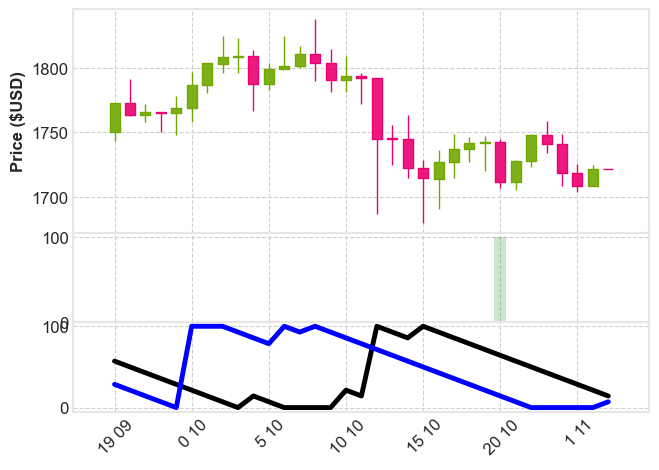

0.36153557463837493


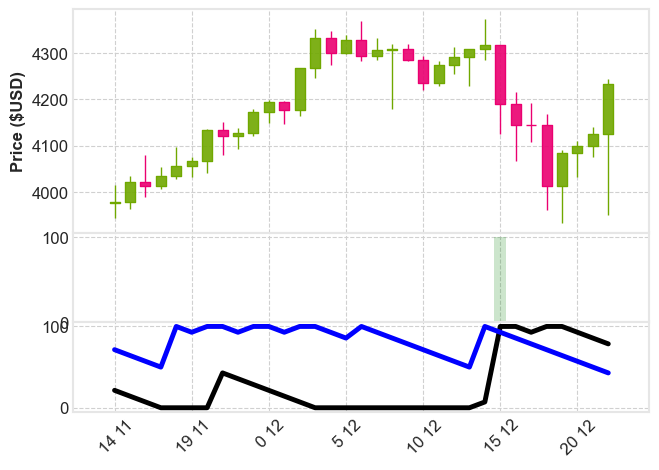

--------------------
--------------------
0.30315168885600563


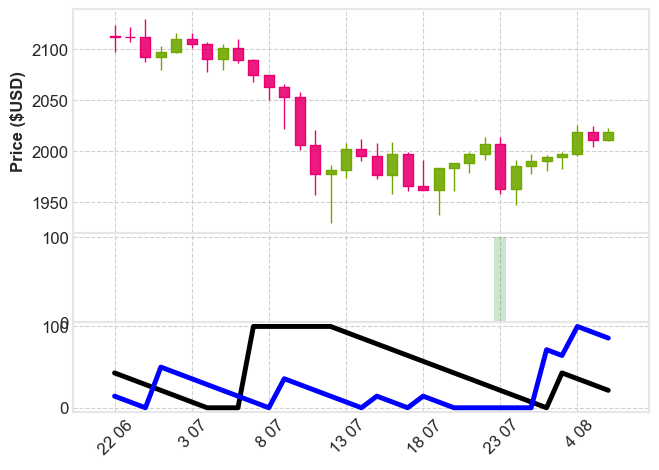

0.3680854361445561


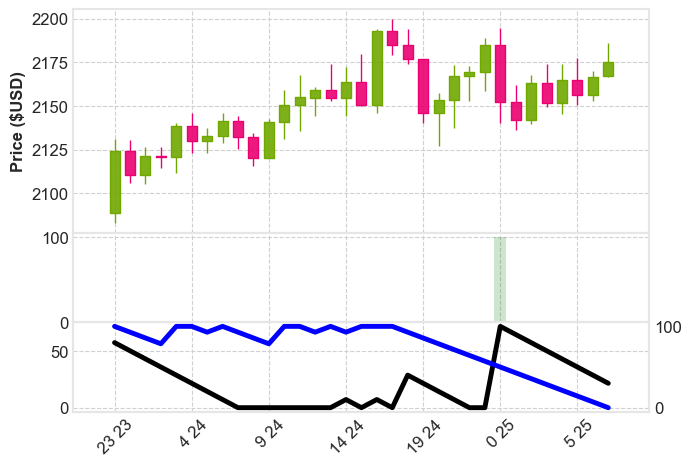

--------------------
--------------------
0.3222492174997638


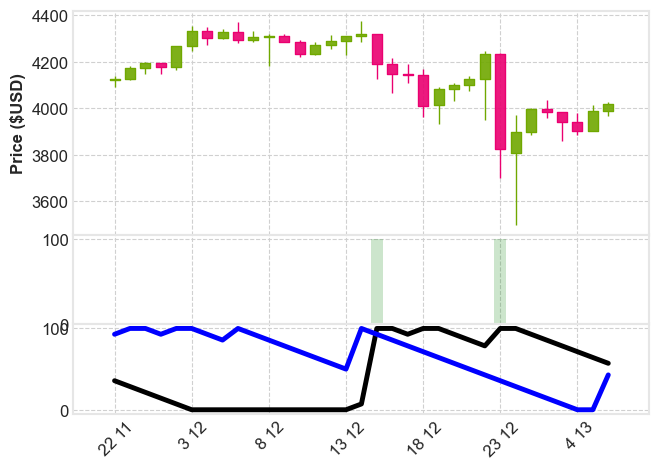

0.25588489873135095


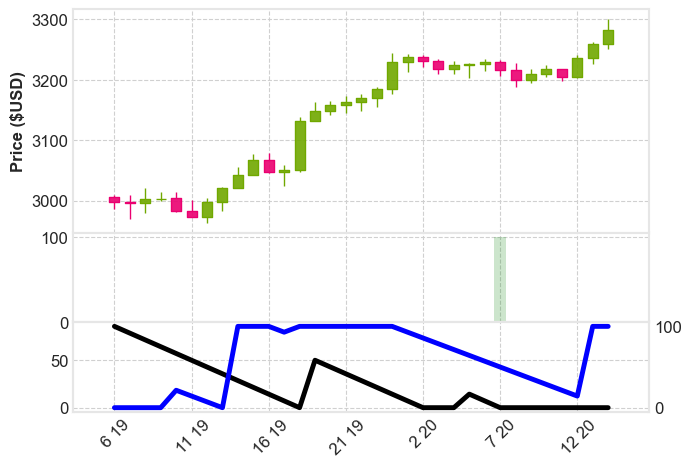

--------------------
--------------------
0.39913135134977107


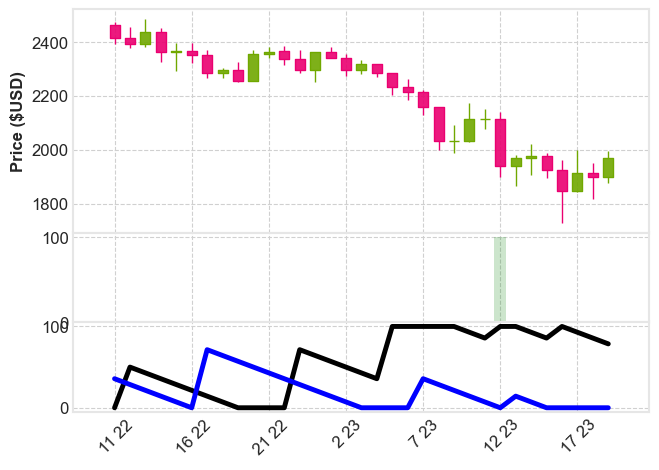

0.19921345568562185


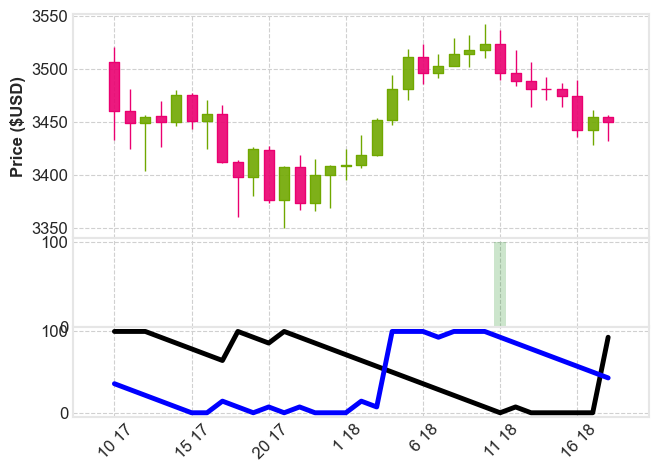

--------------------
--------------------
0.3708245432433245


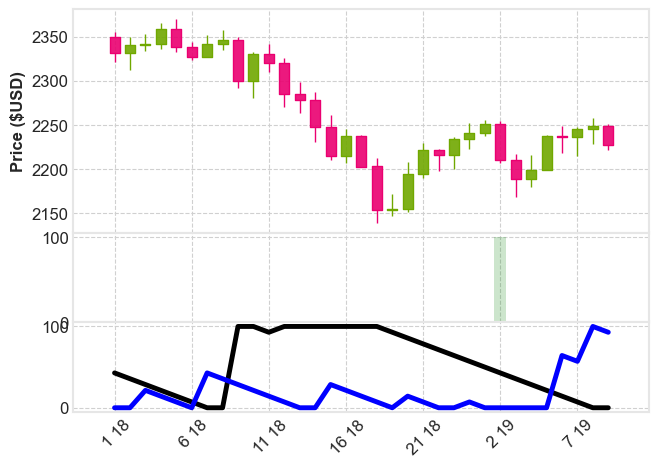

0.32867328118380845


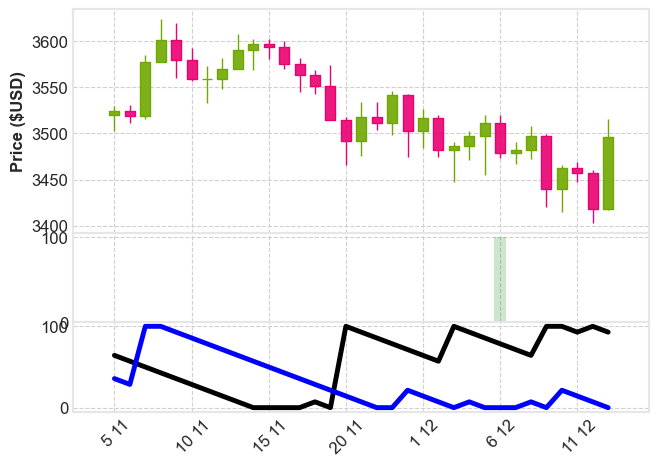

--------------------
--------------------


In [410]:
idxs_true = data[f"{pettern}_test"].loc[lambda x:x==True].index
idxs_false = data[f"{pettern}_test"].loc[lambda x:x==False].index
for i in range(10):
    idx_true = idxs_true[i]
    idx_false = idxs_false[i]
    
    for dt in [idx_true,idx_false]:
        sub = data.loc[dt-25: dt+7]
        sub.set_index("date",inplace=True)
        print(volatility(sub,"adx_7"))
        ap = [mpf.make_addplot(sub[len(test_t)pettern],type='bar',alpha=0.2,color="green",panel=1),
              mpf.make_addplot(sub.aroondown,type='line',alpha=1,color="black",panel=2),
              mpf.make_addplot(sub.aroonup,type='line',alpha=1,color="blue",panel=2),]
        
        mpf.plot(sub, 
                 type='candle', 
                 addplot=ap, 
                 volume=False,
                 ylabel='Price ($USD)',
                 style='binance',
                datetime_format=' %-H %d',
                ) 
    
    print("-"*20)
    print("-"*20)




In [382]:
idxs_true = df[f"{pettern}_test"].loc[lambda x:x==True].index
idxs_false = df[f"{pettern}_test"].loc[lambda x:x==False].index

In [429]:
len(idxs_false)

10

In [316]:
df["volatility"] = np.NaN

In [384]:
v_false = []
v_true = []
h = 7
for idx in idxs_true:
    vals = df.loc[idx-h:idx]
    v = volatility(vals,"dx_5")
    v_true.append(v)
    
for idx in idxs_false:
    vals = df.loc[idx-h:idx]
    v = volatility(vals,"dx_5")
    v_false.append(v)

print("v_ture :",np.mean(v_true))
print("v_false :",np.mean(v_false))

v_ture : 2.4481766342000686
v_false : 2.267029764367689


v_false : 2.267029764367689


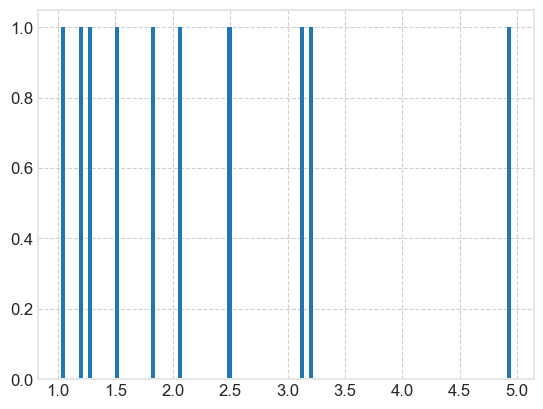

In [385]:
print("v_false :",np.mean(v_false))
plt.hist(v_false,bins=100)
plt.show()

v_ture : 2.4481766342000686


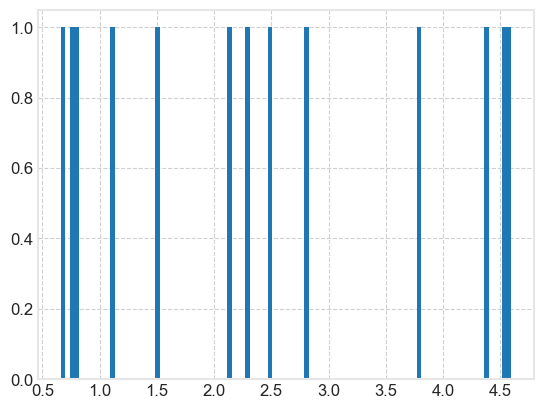

In [386]:
print("v_ture :",np.mean(v_true))
plt.hist(v_true,bins=100)
plt.show()

<BarContainer object of 1669 artists>

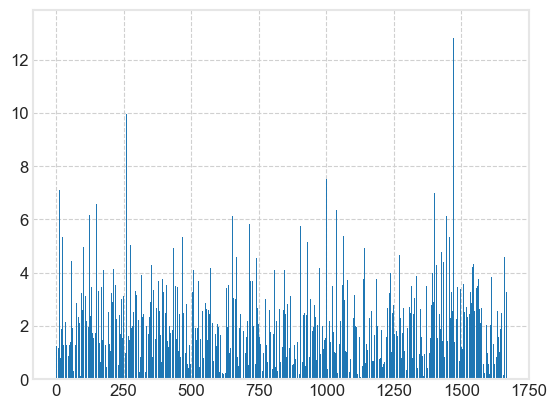

In [372]:
plt.bar(list(range(len(v_true))),v_true)

<BarContainer object of 4714 artists>

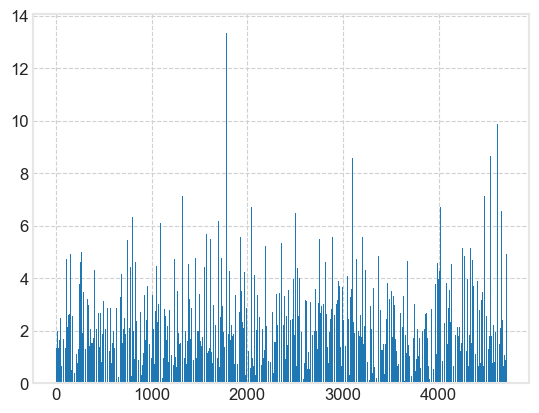

In [373]:
plt.bar(list(range(len(v_false))),v_false)

In [424]:
t = df[df["CDL3LINESTRIKE_test"] == True]
f = df[df["CDL3LINESTRIKE_test"] == False]
test_t = t[t["aroondown"] > t["aroonup"]]
test_f = f[f["aroondown"] > f["aroonup"]]

In [425]:
len(t)


13

In [416]:
len(t)/len(df)

0.00032409254088552056

In [426]:
len(test_f)

5

In [427]:
len(test_t)

9

In [431]:
9/(9+5)

0.6428571428571429